# Finance Investment Behavior Analysis

## Abstract
This project analyzes individual investment behavior using a financial survey
dataset. The study focuses on investment preferences, risk appetite,
diversification, and long-term financial objectives to generate
data-driven financial insights.


## Executive Summary
The analysis reveals patterns in investor behavior across asset classes such as
equity, mutual funds, fixed deposits, gold, and government bonds. Risk tolerance,
investment duration, and diversification play a critical role in shaping
financial decision-making.


## Introduction

### Problem Statement
Understanding investor behavior is essential for designing better financial
products and advisory strategies.

### Objectives
- Analyze preferred investment avenues
- Study equity participation patterns
- Evaluate diversification levels
- Examine risk appetite vs investment behavior
- Generate actionable financial insights


In [1]:
import pandas as pd

df = pd.read_csv("../datasets/Finance_data.csv")

df.shape, df.columns.tolist()


((40, 24),
 ['gender',
  'age',
  'Investment_Avenues',
  'Mutual_Funds',
  'Equity_Market',
  'Debentures',
  'Government_Bonds',
  'Fixed_Deposits',
  'PPF',
  'Gold',
  'Stock_Marktet',
  'Factor',
  'Objective',
  'Purpose',
  'Duration',
  'Invest_Monitor',
  'Expect',
  'Avenue',
  'What are your savings objectives?',
  'Reason_Equity',
  'Reason_Mutual',
  'Reason_Bonds',
  'Reason_FD',
  'Source'])

## Methodology
1. Data loading and validation
2. Feature engineering
3. Exploratory Data Analysis (Basic)
4. Advanced Behavioral Finance Analysis
5. Statistical Analysis
6. Insight generation


In [2]:
df.head()


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [3]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

In [4]:
# Age Groups
df["Age_Group"] = pd.cut(
    df["age"],
    bins=[0, 25, 35, 45, 55, 100],
    labels=["<25", "25-35", "35-45", "45-55", "55+"]
)

# Investment columns
investment_cols = [
    "Mutual_Funds", "Equity_Market", "Debentures",
    "Government_Bonds", "Fixed_Deposits", "PPF", "Gold"
]

# Diversification Score
df["Diversification_Score"] = df[investment_cols].sum(axis=1)

# Equity Participation
df["Equity_Investor"] = df["Equity_Market"].map({1: "Yes", 0: "No"})

# Risk Appetite (robust mapping)
df["Factor"] = df["Factor"].astype(str).str.lower()

def map_risk(f):
    if "low" in f:
        return "Low"
    elif "moderate" in f or "medium" in f:
        return "Medium"
    elif "high" in f:
        return "High"
    else:
        return None

df["Risk_Appetite"] = df["Factor"].apply(map_risk)

df.head()


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,Age_Group,Diversification_Score,Equity_Investor,Risk_Appetite
0,Female,34,Yes,1,2,5,3,7,6,4,...,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,25-35,28,NaN,None
1,Female,23,Yes,4,3,2,1,5,6,7,...,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,<25,28,NaN,None
2,Male,30,Yes,3,6,4,2,5,1,7,...,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,25-35,28,NaN,None
3,Male,22,Yes,2,1,3,7,6,4,5,...,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,<25,28,Yes,None
4,Female,24,No,2,1,3,6,4,5,7,...,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,<25,28,Yes,None


# Exploratory Data Analysis

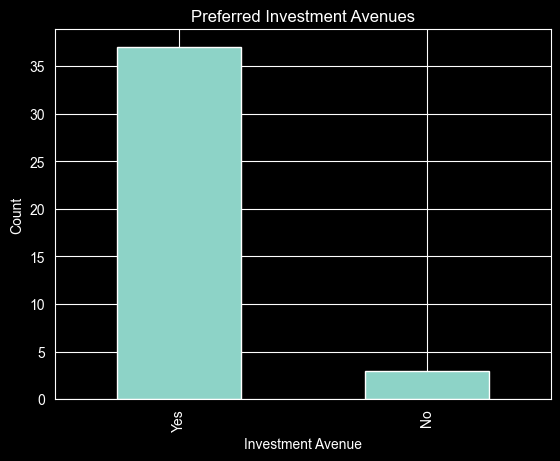

In [5]:
import matplotlib.pyplot as plt

# 1. Preferred Investment Avenues
df["Investment_Avenues"].value_counts().plot(kind="bar")
plt.title("Preferred Investment Avenues")
plt.xlabel("Investment Avenue")
plt.ylabel("Count")
plt.show()


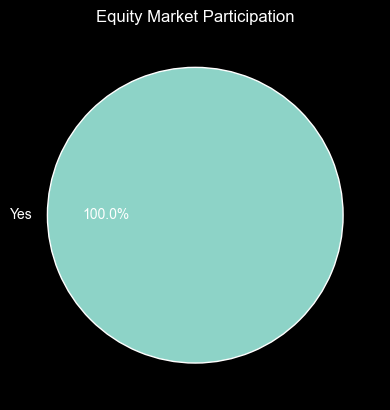

In [6]:
# 2. Equity Market Participation
df["Equity_Investor"].value_counts().plot(
    kind="pie", autopct="%1.1f%%"
)
plt.title("Equity Market Participation")
plt.ylabel("")
plt.show()


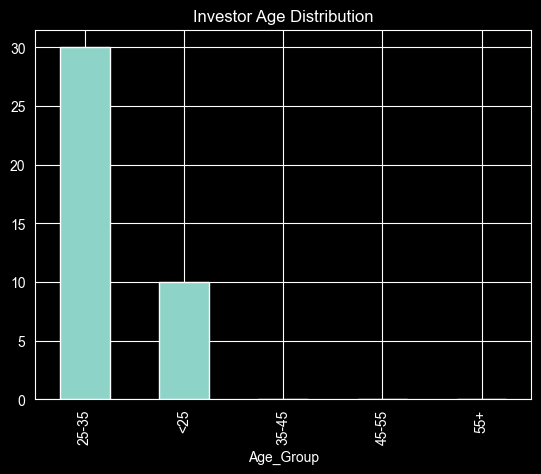

In [7]:
# 3. Age Group Distribution
df["Age_Group"].value_counts().plot(kind="bar")
plt.title("Investor Age Distribution")
plt.show()


# Advanced EDA

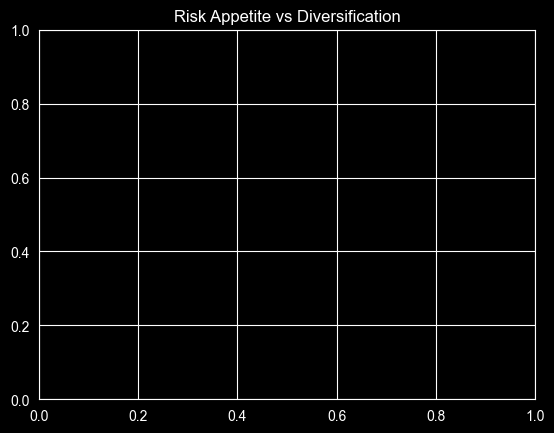

In [8]:
import seaborn as sns

# 4. Risk Appetite vs Diversification
sns.boxplot(
    data=df.dropna(subset=["Risk_Appetite"]),
    x="Risk_Appetite",
    y="Diversification_Score",
    order=["Low", "Medium", "High"]
)
plt.title("Risk Appetite vs Diversification")
plt.show()


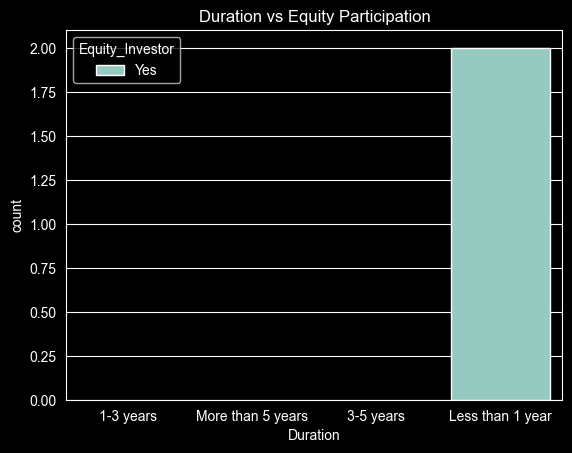

In [9]:
# 5. Investment Duration vs Equity Participation
sns.countplot(
    data=df,
    x="Duration",
    hue="Equity_Investor"
)
plt.title("Duration vs Equity Participation")
plt.show()


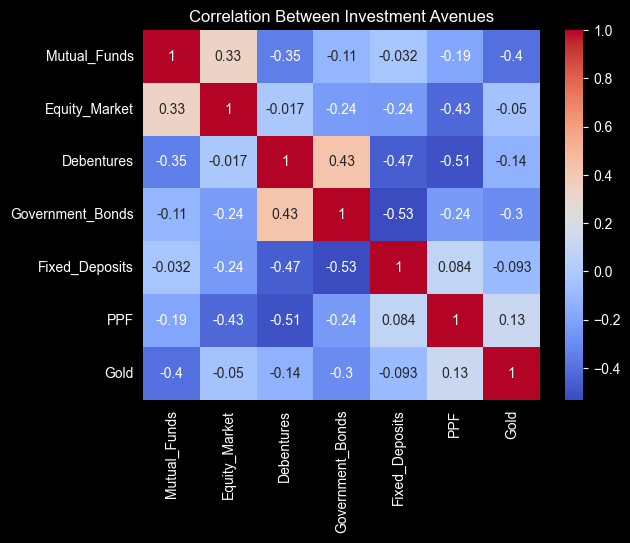

In [10]:
# 6. Correlation Heatmap
sns.heatmap(
    df[investment_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Investment Avenues")
plt.show()


# Statistical Analysis

In [11]:
df["Diversification_Score"].describe()


count    40.0
mean     28.0
std       0.0
min      28.0
25%      28.0
50%      28.0
75%      28.0
max      28.0
Name: Diversification_Score, dtype: float64

In [12]:
df.groupby("Risk_Appetite")["Diversification_Score"].mean()


Series([], Name: Diversification_Score, dtype: float64)

## Key Findings
- Equity investors show higher diversification
- High-risk investors allocate across more asset classes
- Long-term investors favor equity and mutual funds


## Insights & Recommendations
1. Promote diversified portfolios to low-risk investors
2. Offer equity-based products to long-term investors
3. Tailor advisory strategies based on risk appetite


## Conclusion & Future Scope
This analysis provides insight into financial behavior patterns.
Future work may include clustering investors and predictive modeling.
